<a href="https://colab.research.google.com/github/kavya-prabahar/MainFlow/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries:**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [95]:
url = "https://raw.githubusercontent.com/kavya-prabahar/MainFlow/main/Amazon.csv"
df = pd.read_csv(url)

**Data Preprocessing:**

In [96]:
df.head()

,Order ID,Order Date,Ship Date,Status,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,On Time,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   Status        3203 non-null   object 
 4   EmailID       3203 non-null   object 
 5   Geography     3203 non-null   object 
 6   Category      3203 non-null   object 
 7   Product Name  3203 non-null   object 
 8   Sales         3203 non-null   float64
 9   Quantity      3203 non-null   float64
 10  Profit        3203 non-null   float64
dtypes: float64(3), object(8)
memory usage: 275.4+ KB


In [98]:
df.shape

(3203, 11)

In [99]:
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
Status          0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [100]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

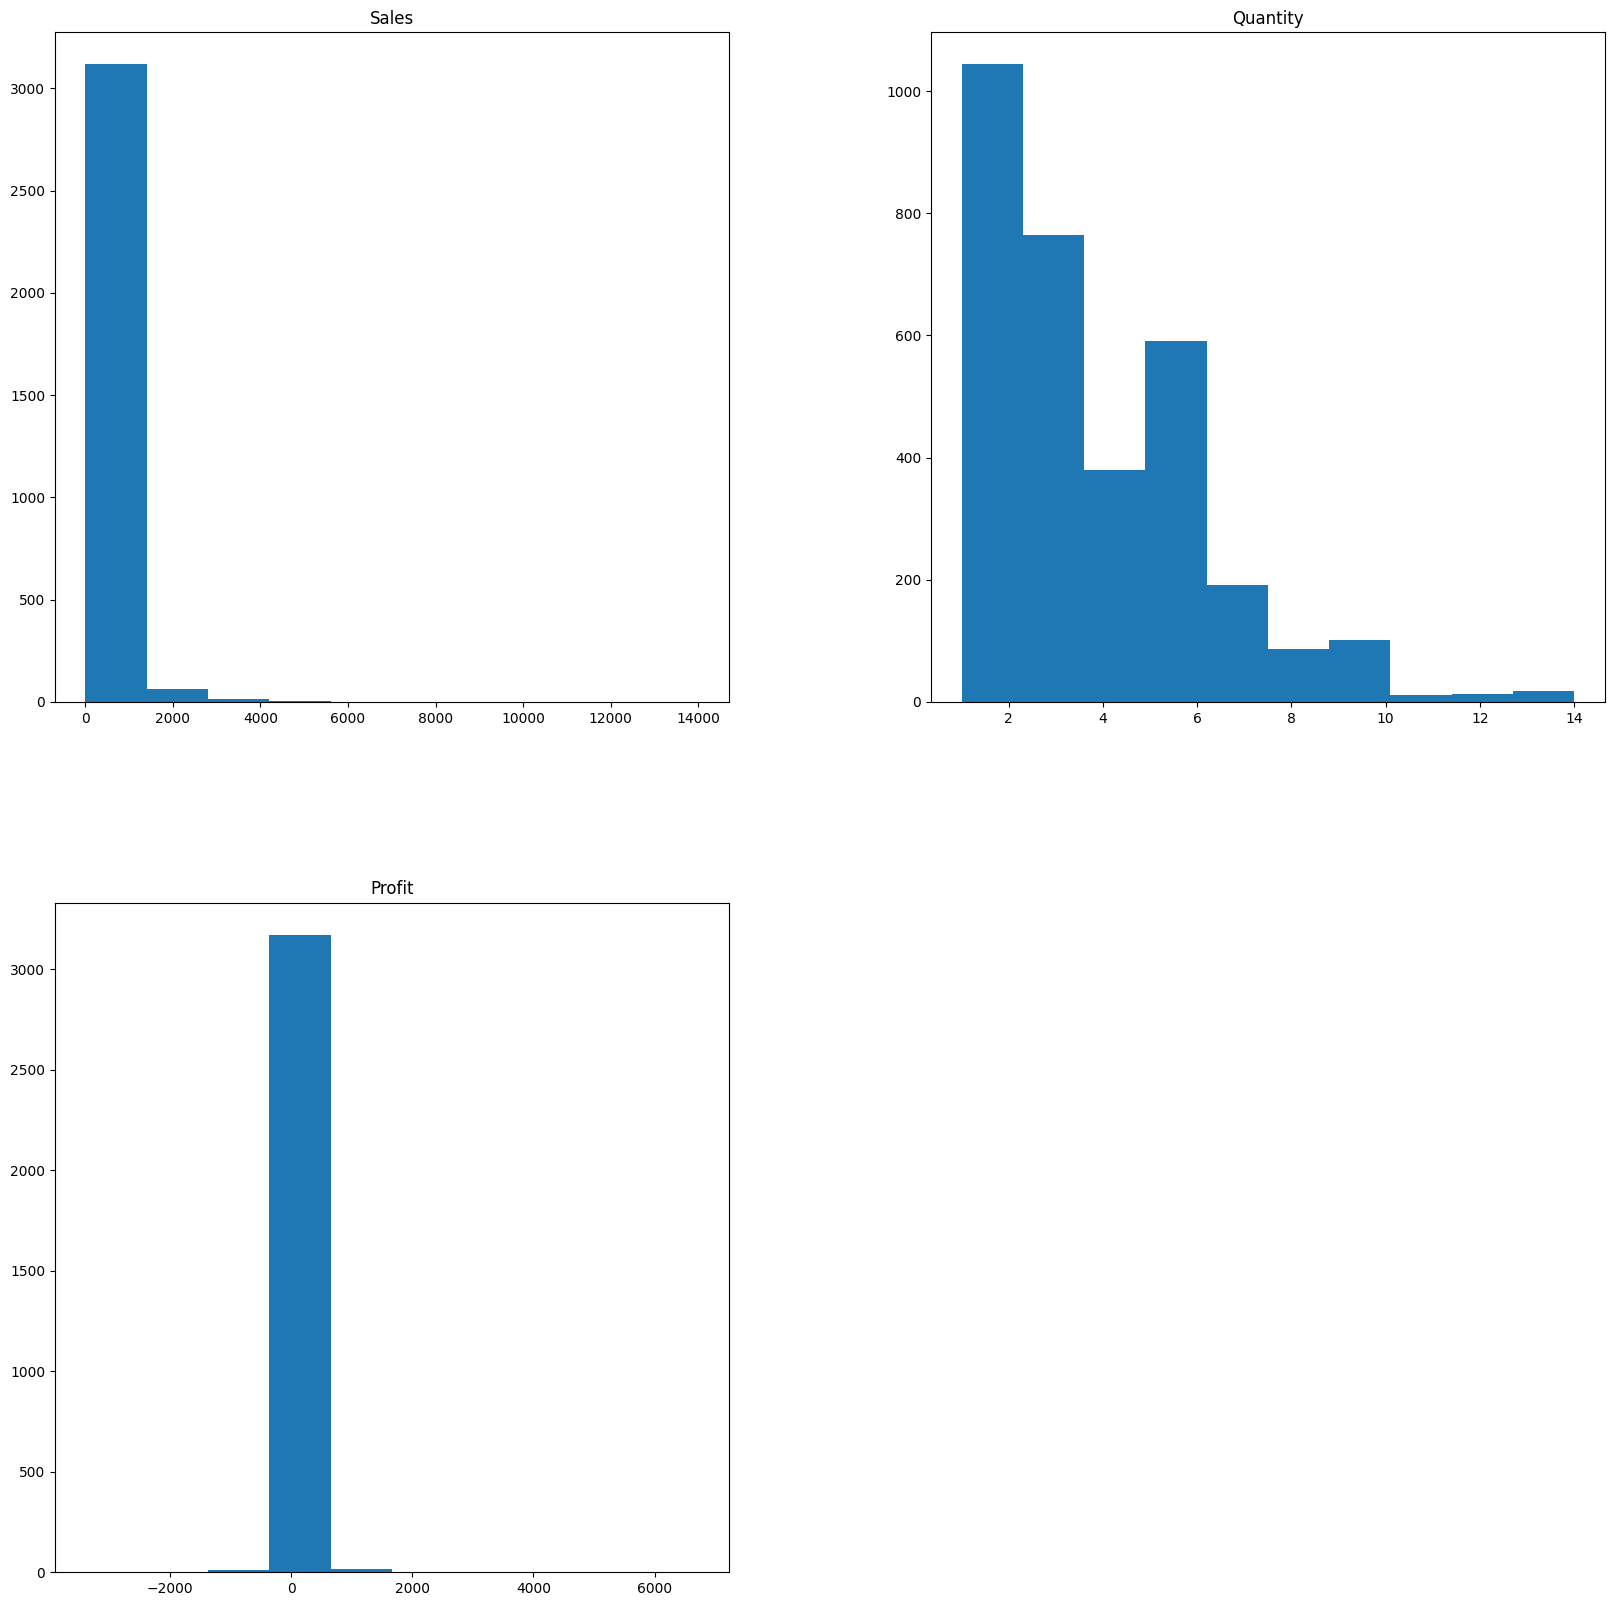

In [101]:
df.hist(grid = False, bins = 10, figsize = (20,20))

In [102]:
def extract_customer_name(email):
    if pd.notnull(email):
        name_part = email.split('@')[0]
        formatted_name = re.sub(r'([a-z])([A-Z])', r'\1 \2', name_part)
        return formatted_name
    return None

df['customer_name'] = df['EmailID'].apply(extract_customer_name)
df.head()


,Order ID,Order Date,Ship Date,Status,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,customer_name
0,CA-2013-138688,13-06-2013,17-06-2013,On Time,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,Darrin Van Huff
1,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,Brosina Hoffman
2,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97,Brosina Hoffman
3,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,Brosina Hoffman
4,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,Brosina Hoffman


In [103]:
df[['Country', 'City', 'State']] = df['Geography'].str.split(',', expand=True)

df.drop('Geography', axis=1, inplace=True)

df.head()


,Order ID,Order Date,Ship Date,Status,EmailID,Category,Product Name,Sales,Quantity,Profit,customer_name,Country,City,State
0,CA-2013-138688,13-06-2013,17-06-2013,On Time,DarrinVanHuff@gmail.com,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,Darrin Van Huff,United States,Los Angeles,California
1,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,Brosina Hoffman,United States,Los Angeles,California
2,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,Art,Newell 322,7.28,4.0,1.97,Brosina Hoffman,United States,Los Angeles,California
3,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,Brosina Hoffman,United States,Los Angeles,California
4,CA-2011-115812,09-06-2011,14-06-2011,Delay,BrosinaHoffman@gmail.com,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,Brosina Hoffman,United States,Los Angeles,California


**1. Total sales per year:**

In [104]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
print(df['Order Date'].isna().sum())
df['Order Year'] = df['Order Date'].dt.year
yearly_count = df.groupby('Order Year')['Order ID'].count()

print(yearly_count)

0
Order Year
2011     661
2012     642
2013     801
2014    1099
Name: Order ID, dtype: int64


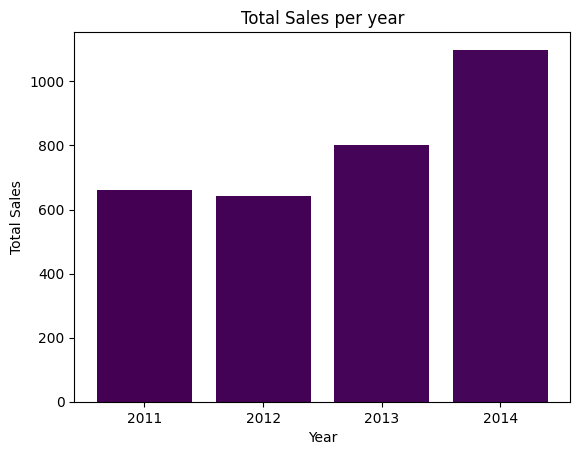

In [105]:
colors = plt.cm.viridis(range(len(yearly_count)))

plt.bar(yearly_count.index, yearly_count.values,color = colors)
plt.title("Total Sales per year")
plt.xticks(yearly_count.index)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

**2. Comparing the status of the orders:**



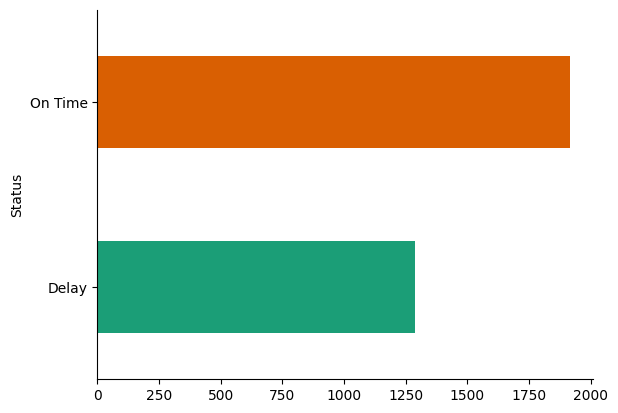

In [106]:
df.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**3. Total sales per category:**

In [107]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Chairs         101781.36
Phones          98684.39
Tables          84754.60
Storage         70532.84
Accessories     61114.10
Binders         55961.11
Copiers         49749.23
Machines        42444.14
Bookcases       36004.18
Appliances      30236.32
Furnishings     30072.73
Paper           26663.73
Supplies        18127.12
Art              9212.06
Labels           5078.72
Envelopes        4118.10
Fasteners         923.20
Name: Sales, dtype: float64


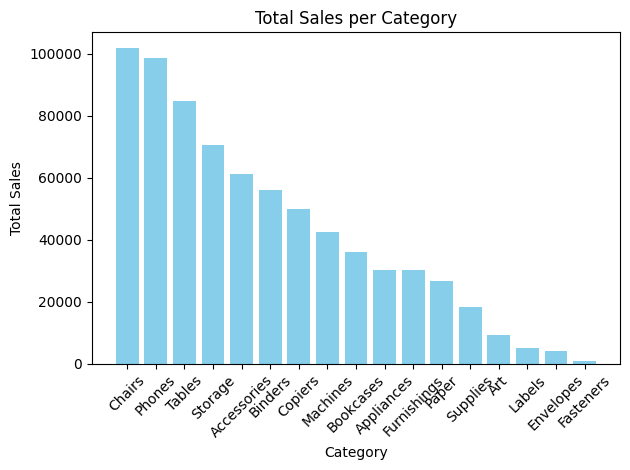

In [108]:
plt.figsize=(12, 8)
plt.bar(category_sales.index, category_sales.values, color='skyblue')
plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4. Total Profit Comparison by Order Status:**

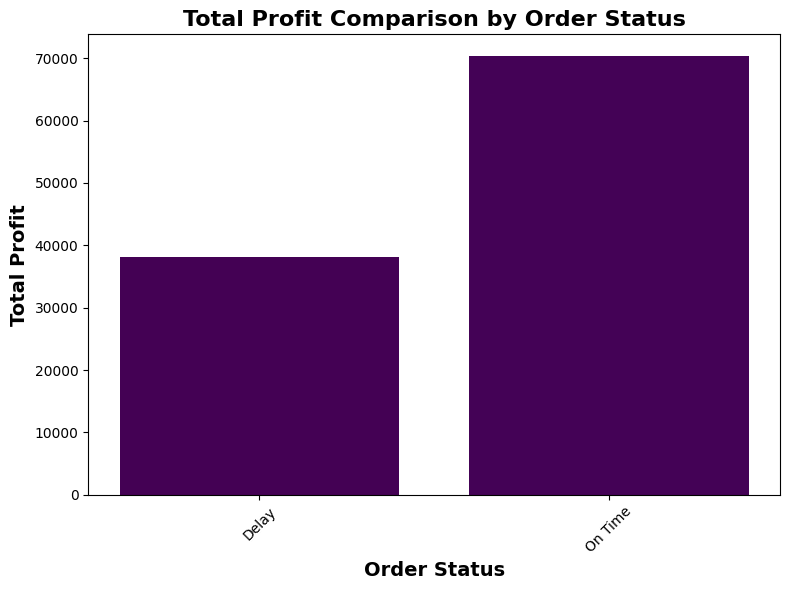

In [109]:
profit_comparison = df.groupby('Status')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(range(len(profit_comparison)))
plt.bar(profit_comparison['Status'], profit_comparison['Profit'], color=colors)
plt.title("Total Profit Comparison by Order Status", fontsize=16, fontweight='bold')
plt.xlabel("Order Status", fontsize=14, fontweight='bold')
plt.ylabel("Total Profit", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**5.Sales over time:**

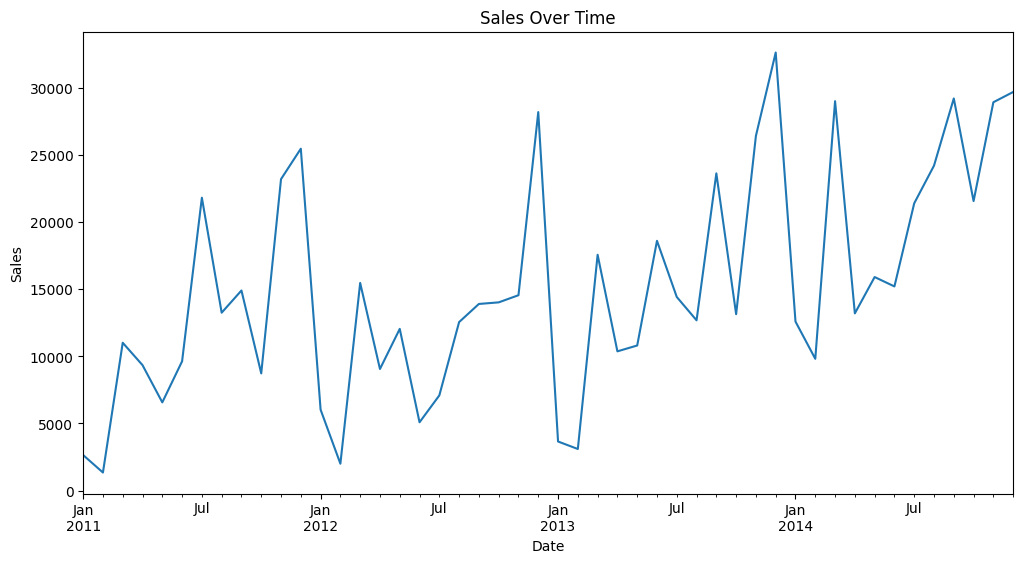

In [110]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

df.set_index('Order Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

**6. Profit Comparison between current and previous years:**

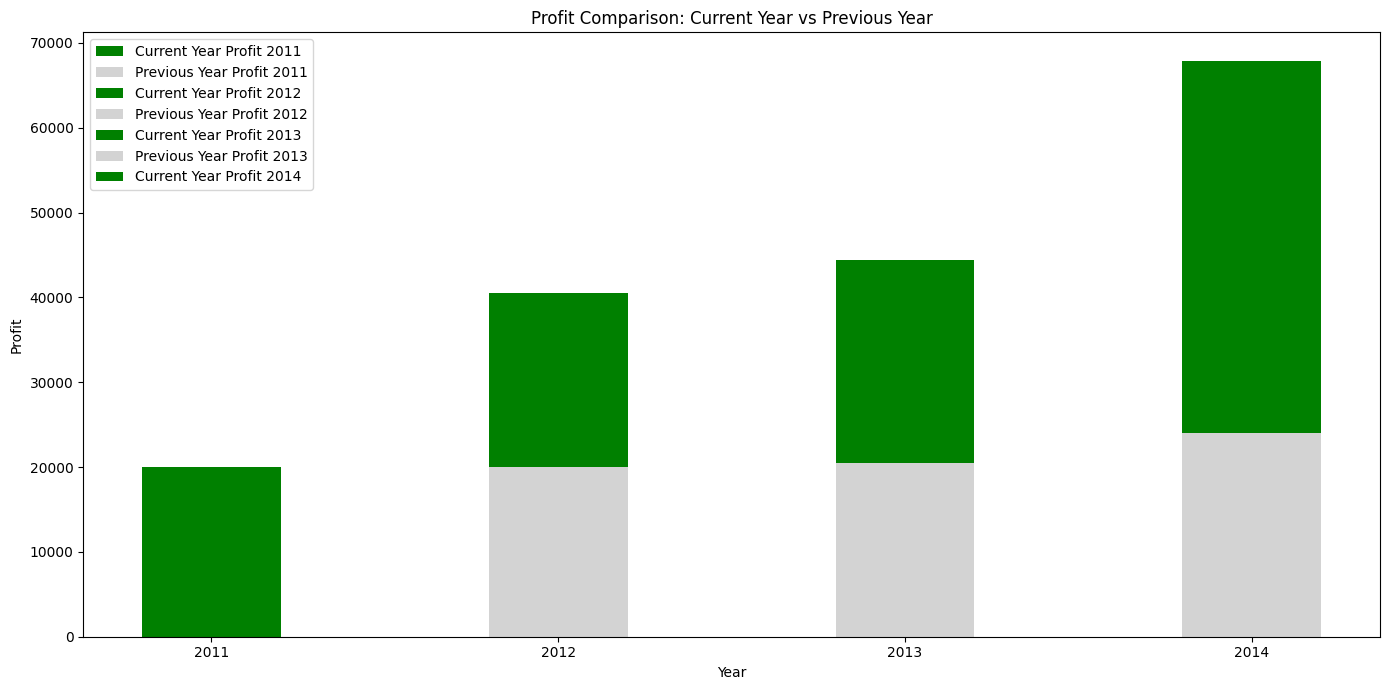

In [111]:
annual_profit = df['Profit'].resample('Y').sum()

years = annual_profit.index.year.unique()

plt.figure(figsize=(14, 7))

for year in years:
    current_year = year
    previous_year = current_year - 1

    current_year_profit = annual_profit.get(pd.Timestamp(f'{current_year}-12-31'), 0)
    previous_year_profit = annual_profit.get(pd.Timestamp(f'{previous_year}-12-31'), 0)

    plt.bar(current_year, previous_year_profit, color='lightgray', width=0.4, align='center',
            label=f'Previous Year Profit {previous_year}' if previous_year_profit > 0 else "")

    plt.bar(current_year, current_year_profit, color='green' if previous_year_profit < current_year_profit else 'red', width=0.4, align='center',
            bottom=previous_year_profit, label=f'Current Year Profit {current_year}' if current_year_profit > 0 else "")

plt.title("Profit Comparison: Current Year vs Previous Year")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()

**7. Top 10 Cities by Sales:**

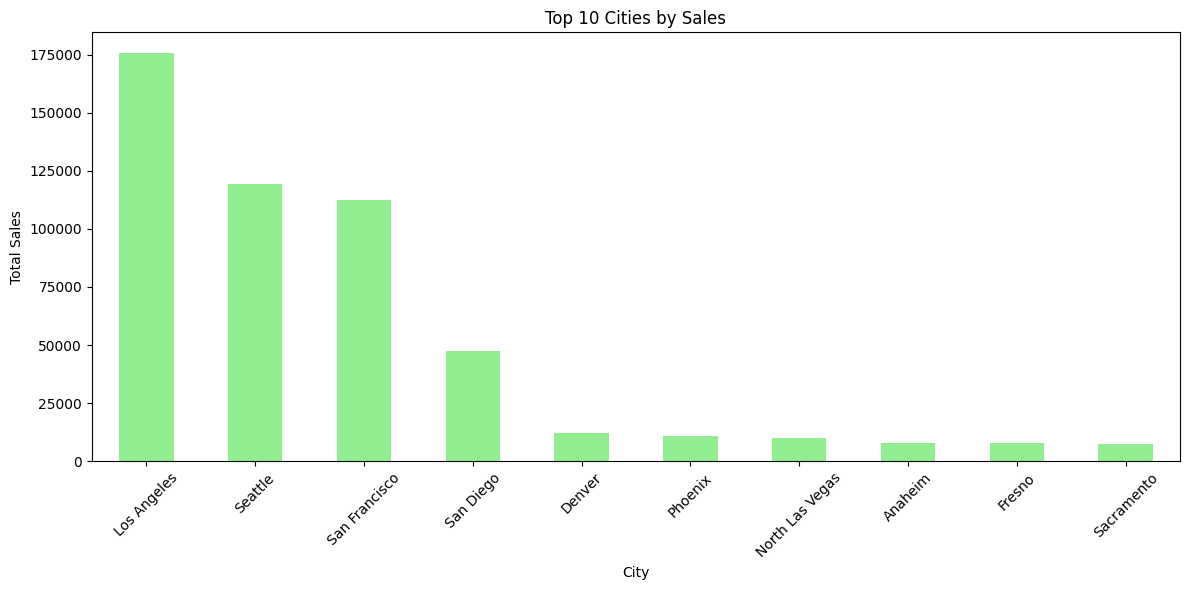

In [112]:
city_sales = df.groupby('City')['Sales'].sum()

top_10_cities = city_sales.nlargest(10)

plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**8. Top 10 Cities by Profit:**

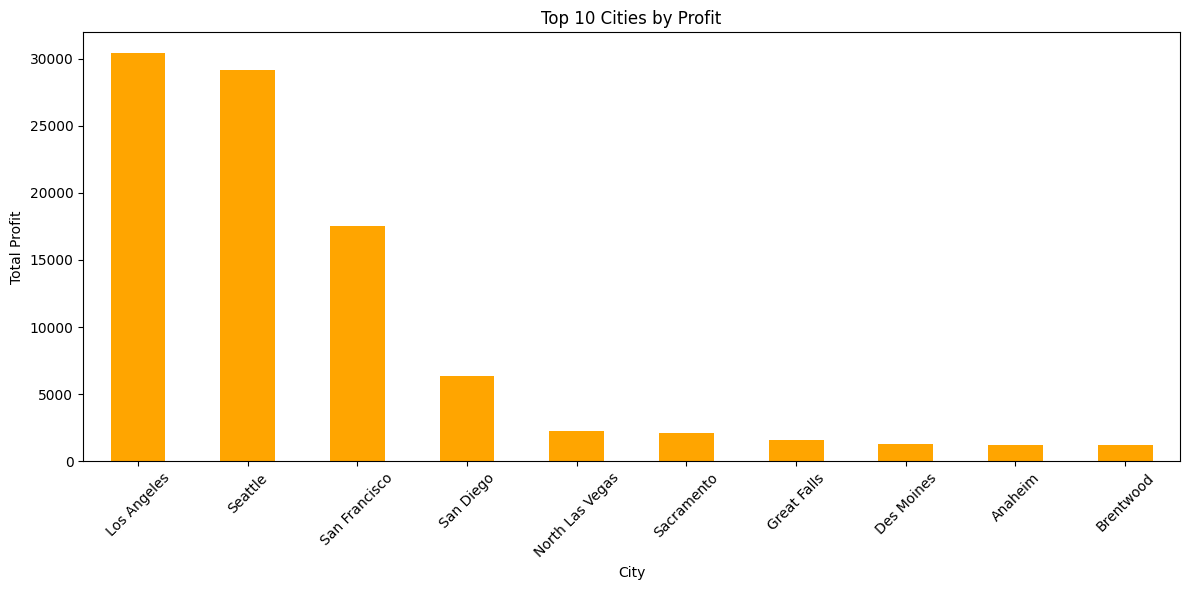

In [113]:
city_profit = df.groupby('City')['Profit'].sum()

top_10_cities = city_profit.nlargest(10)

plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Profit")
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**9. Top 5 Products by Sales:**

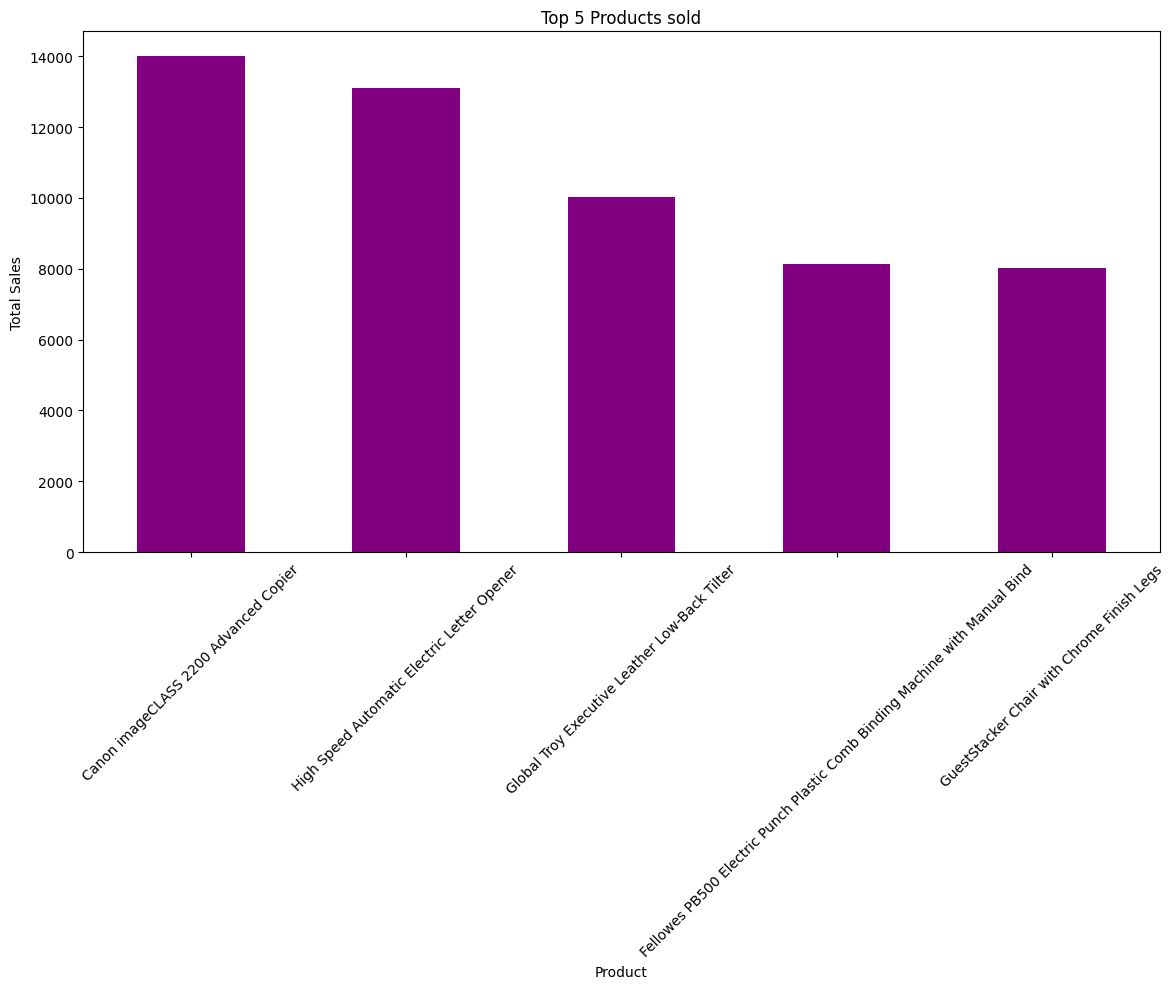

In [114]:
product_sales = df.groupby('Product Name')['Sales'].sum()

top_products = product_sales.nlargest(5)

plt.figure(figsize=(12, 10))
top_products.plot(kind='bar', color='purple')
plt.title("Top 5 Products sold")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**10. Top 10 Customers:**

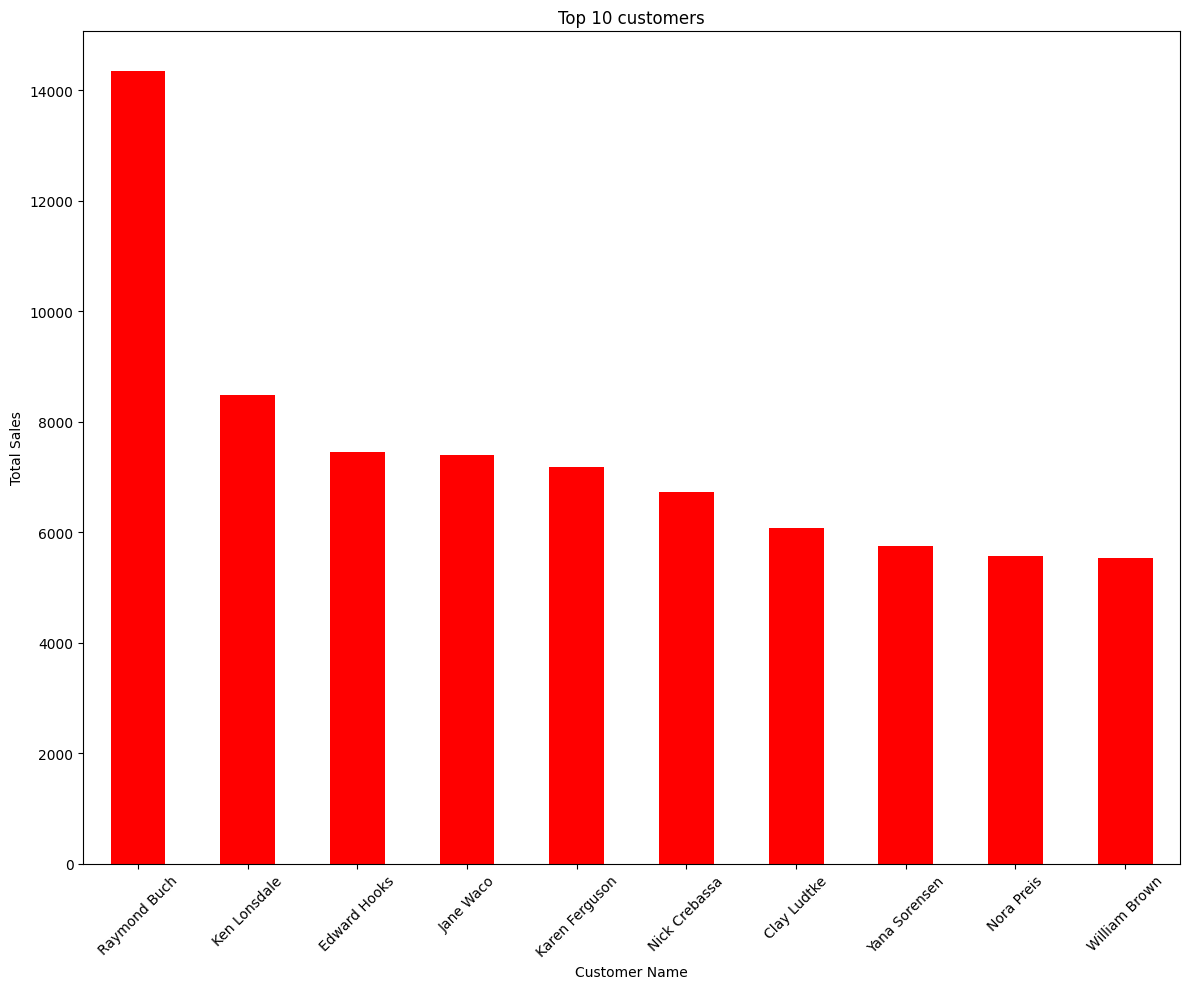

In [115]:
customers = df.groupby('customer_name')['Sales'].sum()

top_customers = customers.nlargest(10)

plt.figure(figsize=(12, 10))
top_customers.plot(kind='bar', color='red')
plt.title("Top 10 customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()